# Frametime mocap

Not equal mean because of the network traffic, and yet there was not loss packet

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    print(stats.to_latex())

SIZE: 7363
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.082 &   8.235 &  8.313 &  20.705 &      2.109 \\
agent\_ms\_2 &  0.089 &   8.204 &  8.316 &  19.451 &      2.187 \\
agent\_ms\_3 &  0.035 &   8.185 &  8.151 &  33.530 &      2.520 \\
agent\_ms\_4 &  0.067 &   8.207 &  8.321 &  21.807 &      2.317 \\
agent\_ms\_5 &  0.066 &   8.267 &  8.320 &  21.918 &      2.302 \\
agent\_ms\_6 &  0.036 &   8.352 &  8.320 &  31.393 &      2.674 \\
agent\_ms\_7 &  0.024 &   8.355 &  8.322 &  30.924 &      2.957 \\
agent\_ms\_8 &  0.027 &   8.305 &  8.323 &  38.016 &      3.175 \\
\bottomrule
\end{tabular}



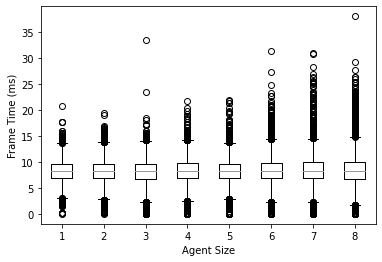

levene:
LeveneResult(statistic=109.52734239584093, pvalue=3.278295285090409e-160)
Anova or Kruskal:
KruskalResult(statistic=12.513297143026962, pvalue=0.08489287870744121)


In [3]:
#Load file
frametime_mocap = pd.read_csv('./FinalDatasets/mocap/frametime-mocap-on-system-allagents-ms.csv')
print("SIZE: " + str(frametime_mocap.shape[0]))
descriptive_stats(frametime_mocap)

boxdata = frametime_mocap.transpose().values.tolist()
fig, ax = plt.subplots()
ax.boxplot(boxdata)
plt.xlabel('Agent Size')
plt.ylabel('Frame Time (ms)')
plt.savefig('figures/3-frametime-mocap/mocap-frametime-boxplot.pdf')
plt.show()

d1, d2, d3, d4, d5, d6, d7, d8 = frametime_mocap.transpose().values.tolist()
levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
print("levene:\n" + str(levene_result))
anova_result = kruskal(d1, d2, d3, d4, d5, d6, d7, d8)
print("Anova or Kruskal:\n" + str(anova_result))
